# Notebook 1: Statistical learning. Variance vs Bias

## Overview

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult.

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations:
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials).


Run the code for the following cases:
<ul>
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.


# Training the models:

<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:71: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_206421/126406981.py:71: SyntaxWarning: invalid escape sequence '\s'
  Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)


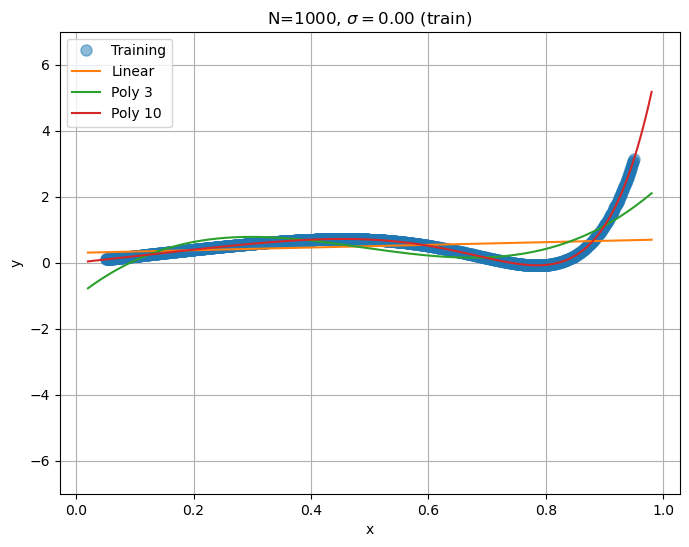

In [1]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=1000
sigma_train=0;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
#y=2*x+s

# Tenth Order
y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


# Testing the fitted models

<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_206421/1269318591.py:39: SyntaxWarning: invalid escape sequence '\s'
  Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)


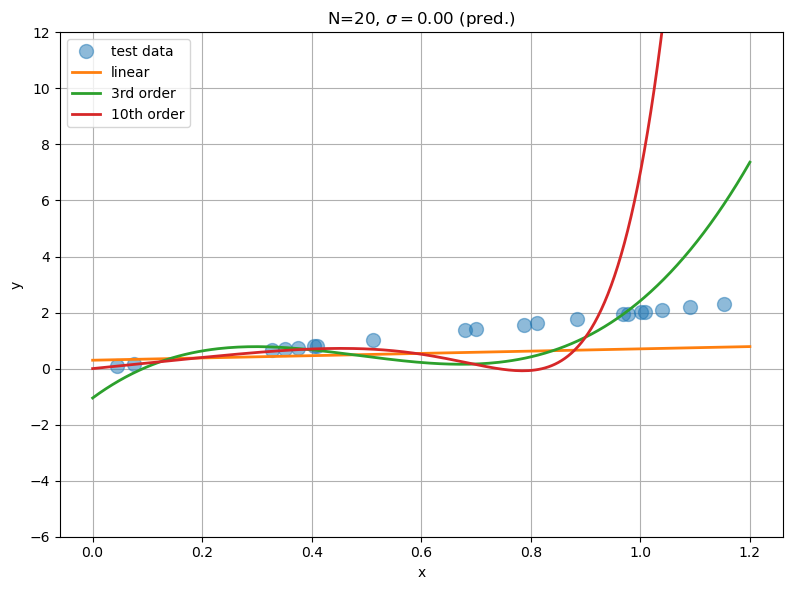

In [2]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Solution

## Functions definition

In [3]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
np.random.seed(1234) 

In [4]:
def get_mse(x,y,X_plot, generate_function, clf):
    mse= (1/len(y))*np.sum((y-clf.predict(X_plot))**2)
    return mse    

In [5]:
def do_fit(N_train, sigma_train,generate_function, x_min_test=0.02, x_max_test=0.98, plot_full_range=False):
    # Train on integers
    x=np.linspace(0.05,0.95,N_train)
    # Draw Gaussian random noise
    y=generate_function(x,sigma_train)
    
    p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
    if (x_min_test != 0.02):
        
        x_test = x_max_test*np.random.random(N_train + 15)
        y_test=generate_function(x_test,sigma_train)
        p2=plt.plot(x_test, y_test, "o", ms=8, alpha=0.5, label='Test data')
  
    # Linear Regression : create linear regression object
    clf = linear_model.LinearRegression()
    
    # Train the model using the training set
    # Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
    clf.fit(x[:, np.newaxis], y)
    
    # Use fitted linear model to predict the y value:
    xplot=np.linspace(x_min_test, x_max_test,200)
    xplot_short = xplot[x_plot < 1.]
    xplot_high = xplot[x_plot > 1.]
    y_plot=generate_function(xplot, sigma_train)
    y_plot_short = xplot[x_plot < 1.]
    y_plot_high = xplot[x_plot > 1.]
    # print(xplot)
    # grid of points, some are in the training set, some are not
    linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')
    

    
    # Polynomial Regression
    poly3 = PolynomialFeatures(degree=3)
    # Construct polynomial features
    X3 = poly3.fit_transform(x[:,np.newaxis])
    clf3 = linear_model.LinearRegression()
    clf3.fit(X3,y)
    
    Xplot3=poly3.fit_transform(xplot[:,np.newaxis])
    Xplot3_short=poly3.fit_transform(xplot_short[:,np.newaxis])
    if (x_min_test != 0.02):
        Xplot3_high=poly3.fit_transform(xplot_high[:,np.newaxis])
    poly3_plot=plt.plot(xplot, clf3.predict(Xplot3), label='Poly 3') 
    

    
    poly10 = PolynomialFeatures(degree=10)
    X10 = poly10.fit_transform(x[:,np.newaxis])
    clf10 = linear_model.LinearRegression()
    clf10.fit(X10,y)
    
    Xplot10=poly10.fit_transform(xplot[:,np.newaxis])
    Xplot10_short=poly10.fit_transform(xplot_short[:,np.newaxis])
    if (x_min_test != 0.02):
        Xplot10_high=poly10.fit_transform(xplot_high[:,np.newaxis])
    
    poly10_plot=plt.plot(xplot, clf10.predict(Xplot10), label='Poly 10')

    plt.legend(loc='best')
    plt.ylim([-7, 7])
    if plot_full_range:
        plt.ylim([-7,2+np.max(y_test)])
    plt.xlabel("x")
    plt.ylabel("y")
    Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
    plt.title(Title+" (train)")
    
    
    # Linear Filename
    filename_train="train-linear_N=%i_noise=%.2f_x-max=%.2f.pdf"%(N_train, sigma_train,x_max_test)
    
    # Tenth Order Filename
    #filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

    # Saving figure and showing results
    plt.savefig(filename_train)
    plt.grid()
    plt.show()

    if not plot_full_range: 
        print("-----------------------------------------------------------------------")
        print("Linear model MSE (train data): ", get_mse(x, y,x[:, np.newaxis],generate_function,clf))
        print("3th order model MSE (train data): ", get_mse(x, y, X3, generate_function, clf3))
        print("10th order model MSE (train data): ", get_mse(x, y, X10, generate_function, clf10))
        
        print("-----------------------------------------------------------------------")
        print("Linear model MSE (0 <x < 1): ", get_mse(xplot_short, y_plot_short,xplot_short[:, np.newaxis],generate_function,clf))
        print("3th order model MSE (0 <x < 1): ", get_mse(xplot_short, y_plot_short, Xplot3_short, generate_function, clf3))
        print("10th order model MSE (0 <x < 1): ", get_mse(xplot_short, y_plot_short, Xplot10_short, generate_function, clf10))
        
        if (x_min_test != 0.02):
            print("-----------------------------------------------------------------------")
            print("Linear model MSE (0< x < 1.2): ", get_mse(xplot,y_plot ,xplot[:, np.newaxis],generate_function,clf))
            print("3th order model MSE (0< x < 1.2): ", get_mse(xplot, y_plot, Xplot3, generate_function, clf3))
            print("10th order model MSE (0< x < 1.2): ", get_mse(xplot, y_plot, Xplot10, generate_function, clf10))

            print("-----------------------------------------------------------------------")
            print("Linear model MSE (1< x < 1.2): ", get_mse(xplot_high, y_plot_high, xplot_high[:, np.newaxis],generate_function,clf))
            print("3th order model MSE (1< x < 1.2): ", get_mse(xplot_high, y_plot_high, Xplot3_high, generate_function, clf3))
            print("10th order model MSE (1< x < 1.2): ", get_mse(xplot_high, y_plot_high, Xplot10_high, generate_function, clf10))
    
    

<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_206421/89598041.py:67: SyntaxWarning: invalid escape sequence '\s'
  Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)


In [6]:
def linear_generator(x,sigma_train): 
    return 2*x+sigma_train*np.random.randn(len(x))
    
def polynomial_generator(x,sigma_train):
    return 2*x-10*x**5+15*x**10+sigma_train*np.random.randn(len(x))

## Code

The code define a function 
do_fit(N_train, sigma, generation_function, x_min, x_max, plot_full_range)

- N_train is the number of entries in the train dataset
- sigma is the stardard deviation of the noise
- generation funcion is the "True" function
- xmin is the min value of the test dataset
- xmax is the max value of the test dataset
- plot_full_range change the y axis range to see all the test points?

The function plot the train data,a represenation of the test datasets, and the 3 fitted functions.
Also, it prins the MSE for tree diffent cases.
The MSE is calcules with a test sample of 200 events. This can include some events in the train dataset.

The code print MSE calcualted in 3 different ranges.
- 0 < x < 1, this is the range of the train data.
- 1 < x < 1.2, this is the range out of the train data range.
- and the complete range 0 < x < 1.2

This to compare a to see how good the model is insided and outside the training range

## Part 1: predicting when the data is in the model class

For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?

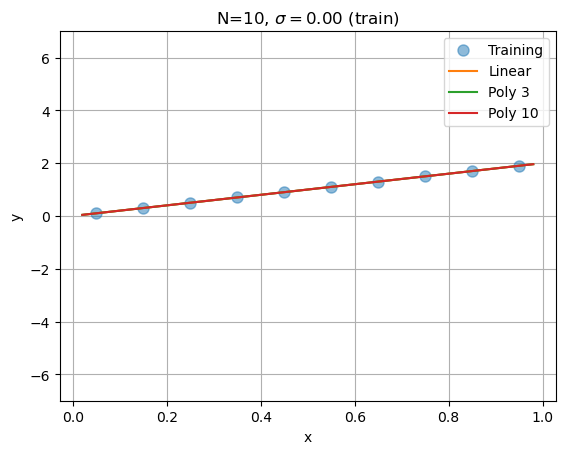

-----------------------------------------------------------------------
Linear model MSE (train data):  2.3804494112626237e-32
3th order model MSE (train data):  5.255862818232767e-32
10th order model MSE (train data):  1.7520184704090685e-31
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.2281542486300851
3th order model MSE (0 <x < 1):  0.228154248630085
10th order model MSE (0 <x < 1):  0.22815424863030692


In [7]:
do_fit(10,0,linear_generator)

Without noise the models fits the data similary. This make sence because the original function is really simple and the predricted model contains the original function.

Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
- Not necessarily, if the model is too complex and there is not enough training data, the model could learn the exact pattern of the training data, which could not be representative of the data that is not used in the training. For example, if our data is given by some function plus noise, the complex model could treat the noise as part of the original function. In a more formal way a complex model could reduce the bias but increase the variance resulting in a worst result.

Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set?


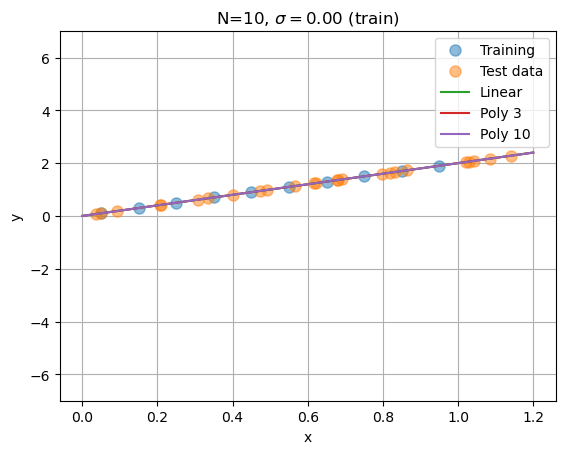

-----------------------------------------------------------------------
Linear model MSE (train data):  2.3804494112626237e-32
3th order model MSE (train data):  5.255862818232767e-32
10th order model MSE (train data):  1.7520184704090685e-31
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.3309916416252116
3th order model MSE (0 <x < 1):  0.3309916416252114
10th order model MSE (0 <x < 1):  0.3309916416437039
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  3.4324465136666177e-32
3th order model MSE (0< x < 1.2):  8.405197630074461e-32
10th order model MSE (0< x < 1.2):  3.685011705047892e-16
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  1.2146056917754606
3th order model MSE (1< x < 1.2):  1.214605691775461
10th order model MSE (1< x < 1.2):  1.2146057644227244


In [8]:
do_fit(10, 0,linear_generator, 0, 1.2)

- All three models represent the data pretty well, and we can see that the MSE is almost zero for all of them. This makes sense because there is no noise and because the true model contains the original function. 

Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?

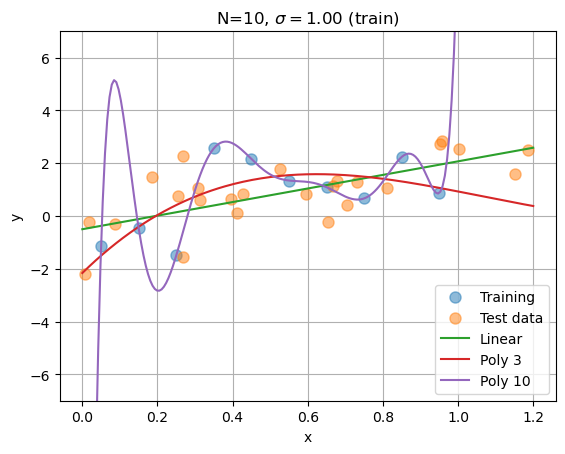

-----------------------------------------------------------------------
Linear model MSE (train data):  1.2520772792907913
3th order model MSE (train data):  0.8751149720659414
10th order model MSE (train data):  1.7980261316049672e-21
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.2837840258814158
3th order model MSE (0 <x < 1):  0.6973087900735766
10th order model MSE (0 <x < 1):  53.70597538796098
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  1.1300647079502109
3th order model MSE (0< x < 1.2):  2.1996314970014037
10th order model MSE (0< x < 1.2):  191855.63807888314
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  1.5122556114236698
3th order model MSE (1< x < 1.2):  0.25704251555958146
10th order model MSE (1< x < 1.2):  1130761.5921058329


In [9]:
do_fit(10,1,linear_generator, 0, 1.2)

- In this case, we can see that the Poly3 and Poly10 models try to fit the data perfectly. This causes the prediction on other datasets, especially outside the range, to fail. This can be seen in the increase in the MSE value with the model complexity. This matches our initial prediction. 

Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?

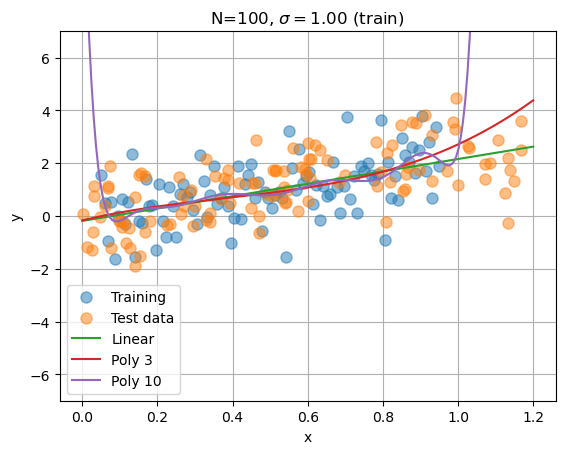

-----------------------------------------------------------------------
Linear model MSE (train data):  0.9436930887792699
3th order model MSE (train data):  0.9304945623113641
10th order model MSE (train data):  0.9004394297013029
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.38114850204481465
3th order model MSE (0 <x < 1):  0.44684148543686913
10th order model MSE (0 <x < 1):  3.4520105105270833
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  1.0873900904676728
3th order model MSE (0< x < 1.2):  1.4504133528076375
10th order model MSE (0< x < 1.2):  13659.817736948671
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  1.6718297760657161
3th order model MSE (1< x < 1.2):  5.8955251314124
10th order model MSE (1< x < 1.2):  80692.30543023274


In [10]:
do_fit(100,1,linear_generator,0,1.2)

- Here we can see an improvement in the MSE values for all the models, especially for the Poly3 function. This also agrees with our prediction because more data helps to reduce the overfitting. Although for the values of x bigger than 1.0, the Poly3 and Poly10 models still can not reproduce the data accurately, this is more noticeable in the case of the Poly10 case.

Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
- sda

## Part 2: Fitting vs. predicting when the data is not in the model class

Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.

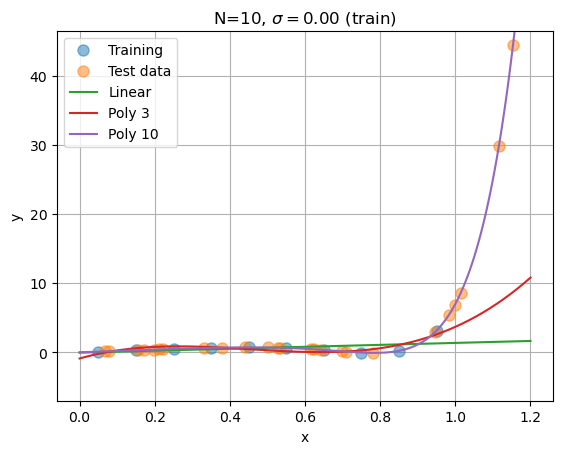

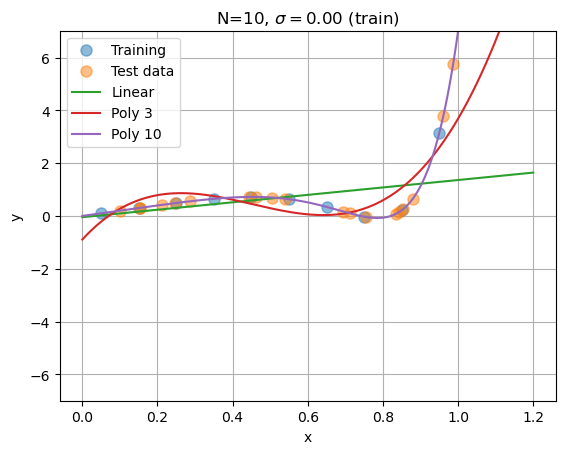

-----------------------------------------------------------------------
Linear model MSE (train data):  0.5783294045915747
3th order model MSE (train data):  0.18602601208748548
10th order model MSE (train data):  1.2943019598259981e-30
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.0379886042916638
3th order model MSE (0 <x < 1):  0.4781870830620006
10th order model MSE (0 <x < 1):  0.9587279576993027
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  195.85811675996
3th order model MSE (0< x < 1.2):  136.53368367128363
10th order model MSE (0< x < 1.2):  5.47722891365322e-08
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  0.1611485785444582
3th order model MSE (1< x < 1.2):  37.53288193996796
10th order model MSE (1< x < 1.2):  1171.4567837118607


In [11]:
# Case N_train = 10, Sigma = 0
do_fit(10,0,polynomial_generator, 0, 1.2, True)
do_fit(10,0,polynomial_generator, 0, 1.2)      

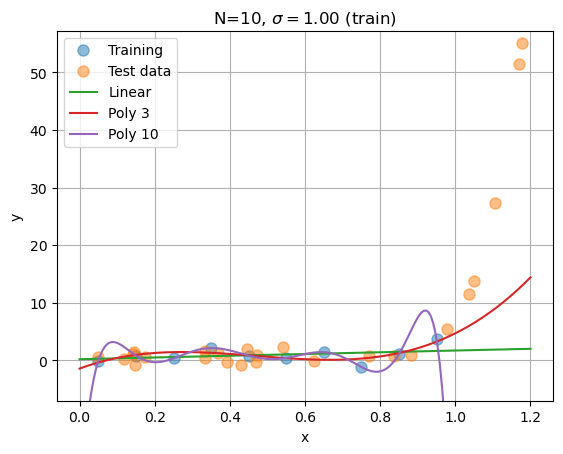

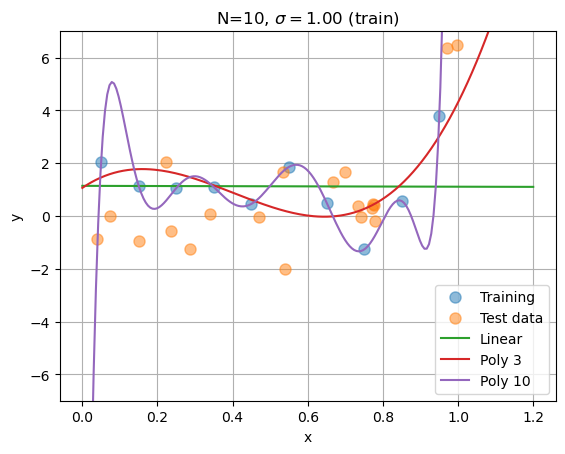

-----------------------------------------------------------------------
Linear model MSE (train data):  1.5324273767555145
3th order model MSE (train data):  0.7656507252444777
10th order model MSE (train data):  4.982620992160375e-21
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.4802387419299227
3th order model MSE (0 <x < 1):  1.2876942119811998
10th order model MSE (0 <x < 1):  53.92378189182723
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  198.99337342653686
3th order model MSE (0< x < 1.2):  125.6959484420919
10th order model MSE (0< x < 1.2):  1555076.0440793247
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  0.0037379079598100105
3th order model MSE (1< x < 1.2):  53.11636905364767
10th order model MSE (1< x < 1.2):  9346315.183710655


In [12]:
# Case N_train = 10, Sigma = 1
do_fit(10,1,polynomial_generator, 0, 1.2, True)
do_fit(10,1,polynomial_generator,0,1.2)

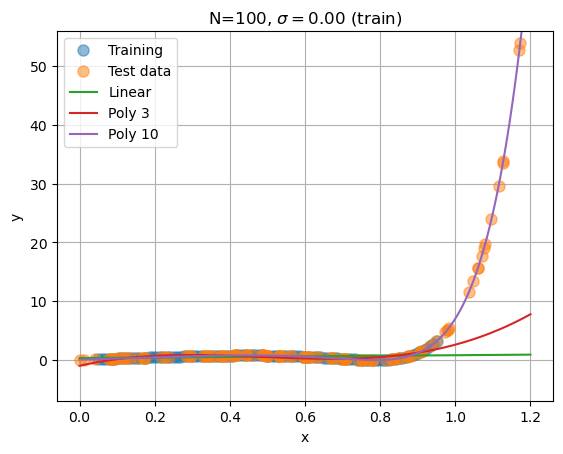

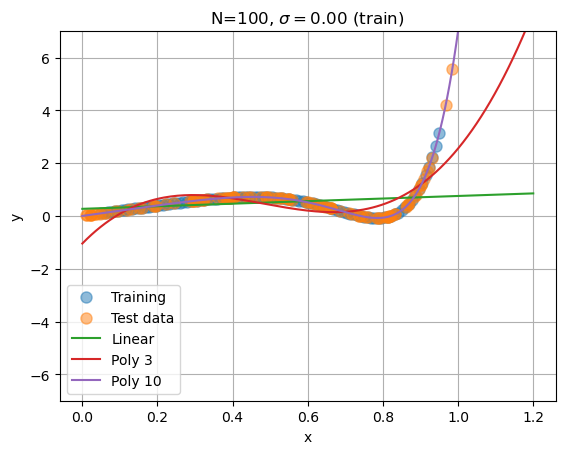

-----------------------------------------------------------------------
Linear model MSE (train data):  0.23732625077689512
3th order model MSE (train data):  0.10789195791763524
10th order model MSE (train data):  6.589800416314254e-31
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.022126316307201674
3th order model MSE (0 <x < 1):  0.22827059923745727
10th order model MSE (0 <x < 1):  0.9587292396937237
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  203.10156277738233
3th order model MSE (0< x < 1.2):  156.2952234989138
10th order model MSE (0< x < 1.2):  6.401451961794108e-25
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  0.08835993111359809
3th order model MSE (1< x < 1.2):  16.34489152480897
10th order model MSE (1< x < 1.2):  1171.493983435961


In [13]:
# Case N_train = 100, Sigma = 0
do_fit(100,0,polynomial_generator,0,1.2, True)
do_fit(100,0,polynomial_generator,0,1.2)

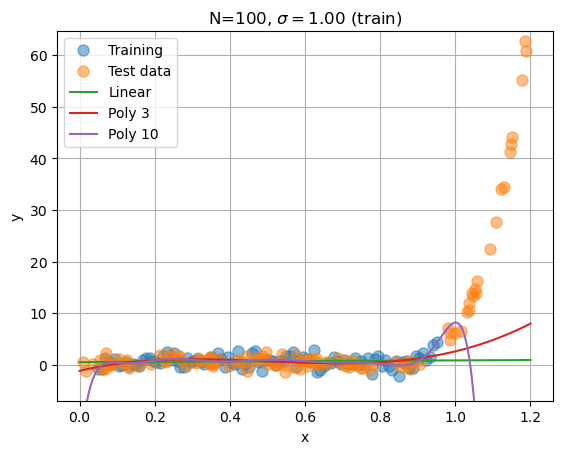

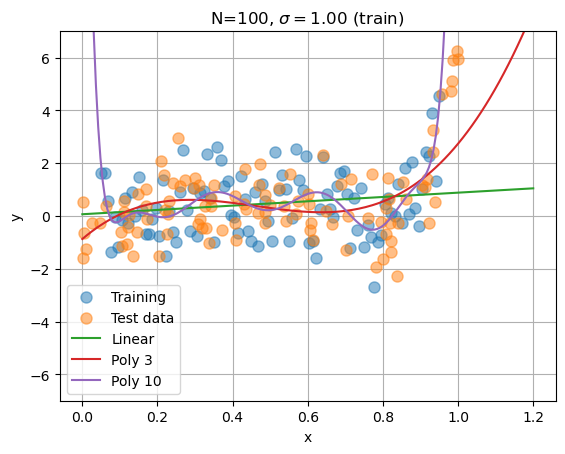

-----------------------------------------------------------------------
Linear model MSE (train data):  1.5062332142030652
3th order model MSE (train data):  1.3830749515673066
10th order model MSE (train data):  1.0671172341814947
-----------------------------------------------------------------------
Linear model MSE (0 <x < 1):  0.003509170525528929
3th order model MSE (0 <x < 1):  0.22018427012238714
10th order model MSE (0 <x < 1):  20.403785290819492
-----------------------------------------------------------------------
Linear model MSE (0< x < 1.2):  204.82890937871866
3th order model MSE (0< x < 1.2):  158.52551910480952
10th order model MSE (0< x < 1.2):  534088.383097595
-----------------------------------------------------------------------
Linear model MSE (1< x < 1.2):  0.01889383915666623
3th order model MSE (1< x < 1.2):  17.276190238676573
10th order model MSE (1< x < 1.2):  3259054.3701738734


In [14]:
# Case N_train = 10, Sigma = 1
do_fit(100,1,polynomial_generator,0,1.2, True)
do_fit(100,1,polynomial_generator,0,1.2)

<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.